## EDA using a GPU

In [1]:
#Setup and load our required modules
import cudf as cu
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as pt
%matplotlib inline

In [2]:
#Setup and point to our data file
path = "/home/david/Downloads/"
file = "companies_sorted.csv"
filePath = path+file

In [3]:
#Lets just capture the time we start this cell
start = datetime.now()
current_time = start.strftime("%H:%M:%S")
#print("Start Time =", current_time)

In [4]:
#an empty list to just organize all the test results
tests = []

# Load and create a GPU based dataframe

In [5]:
#using CUDF and the cuda/rapids code let's read the file from disk and load
#to a CUDF object
df = cu.read_csv(filePath)

In [6]:
#punch out the info about the dataframe
df.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 7173426 entries, 0 to 7173425
Data columns (total 11 columns):
 #   Column                     Dtype
---  ------                     -----
 0   Unnamed: 0                 int64
 1   name                       object
 2   domain                     object
 3   year founded               float64
 4   industry                   object
 5   size range                 object
 6   locality                   object
 7   country                    object
 8   linkedin url               object
 9   current employee estimate  int64
 10  total employee estimate    int64
dtypes: float64(1), int64(3), object(7)
memory usage: 1.3+ GB


In [7]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
#print("End Time =", current_time)
elapsedGPU = (now - start)
#print("That took : ",elapsedGPU)

## Load and create a traditional CPU/RAM based dataframe

In [8]:
start = datetime.now()
current_time = start.strftime("%H:%M:%S")
#print("Start Time =", current_time)
pddf = pd.read_csv(filePath)

In [9]:
pddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173426 entries, 0 to 7173425
Data columns (total 11 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Unnamed: 0                 int64  
 1   name                       object 
 2   domain                     object 
 3   year founded               float64
 4   industry                   object 
 5   size range                 object 
 6   locality                   object 
 7   country                    object 
 8   linkedin url               object 
 9   current employee estimate  int64  
 10  total employee estimate    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 602.0+ MB


In [10]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
#print("End Time =", current_time)
elapsedConv = (now - start)
result = "CSV Read: CPU/RAM: That took : "+ str(elapsedConv) + " with GPU taking " + str(elapsedGPU)
#print(result)
tests.append(result)

## Cleaning

In [11]:
#summarize missing values and null
start = datetime.now()
current_time = start.strftime("%H:%M:%S")
#print("Start Time =", current_time)

del df['Unnamed: 0']

In [12]:
if(df.isnull().values.any()):
    missing = df.isnull().sum()
    print(missing)
    print(" ")
    for col in df.columns:
        print (col, "-\t", df[col].nunique())


df.dropna(axis=0,inplace=True)

name                               3
domain                       1650621
year founded                 3606980
industry                      290003
size range                         0
locality                     2508825
country                      2349207
linkedin url                       0
current employee estimate          0
total employee estimate            0
dtype: int64
 
name -	 7004634
domain -	 5474764
year founded -	 234
industry -	 148
size range -	 8
locality -	 96244
country -	 236
linkedin url -	 7173426
current employee estimate -	 5379
total employee estimate -	 8486


In [13]:
df.notnull().sum()

name                         2535176
domain                       2535176
year founded                 2535176
industry                     2535176
size range                   2535176
locality                     2535176
country                      2535176
linkedin url                 2535176
current employee estimate    2535176
total employee estimate      2535176
dtype: int64

In [14]:
df.groupby('size range').agg({'year founded': ['min', 'max', 'count'], 'country': lambda x: x.nunique(), 'current employee estimate': 'median'})

year founded                   country current employee estimate
                      min     max    count <lambda>                    median
size range                                                                   
1 - 10             1792.0  2103.0  1707032      228                       1.0
10001+             1800.0  2016.0     1366       56                    7556.5
1001 - 5000        1802.0  2018.0    13632      140                     712.0
11 - 50            1801.0  2023.0   570370      216                       8.0
201 - 500          1801.0  2018.0    43749      171                     120.0
5001 - 10000       1451.0  2017.0     1855       75                    2852.0
501 - 1000         1801.0  2018.0    15647      153                     279.0
51 - 200           1799.0  2029.0   181525      197                      35.0

In [15]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
#print("End Time =", current_time)
elapsedGPU = (now - start)
#print("That took : ",elapsedGPU)

In [16]:
start = datetime.now()
current_time = start.strftime("%H:%M:%S")
#print("Start Time =", current_time)

del pddf['Unnamed: 0']

In [17]:
if(pddf.isnull().values.any()):
    missing = pddf.isnull().sum()
    print(missing)
    print(" ")
    for col in pddf.columns:
        print (col, "-\t", pddf[col].nunique())
        
pddf.dropna(axis=0,inplace=True)

name                               3
domain                       1650621
year founded                 3606980
industry                      290003
size range                         0
locality                     2508825
country                      2349207
linkedin url                       0
current employee estimate          0
total employee estimate            0
dtype: int64
 
name -	 7004634
domain -	 5474764
year founded -	 234
industry -	 148
size range -	 8
locality -	 96244
country -	 236
linkedin url -	 7173426
current employee estimate -	 5379
total employee estimate -	 8486


In [18]:
pddf.notnull().sum()

name                         2535176
domain                       2535176
year founded                 2535176
industry                     2535176
size range                   2535176
locality                     2535176
country                      2535176
linkedin url                 2535176
current employee estimate    2535176
total employee estimate      2535176
dtype: int64

In [19]:
pddf.groupby('size range').agg({'year founded': ['min', 'max', 'count'], 'country': lambda x: x.nunique(), 'current employee estimate': 'median'})

year founded                   country current employee estimate
                      min     max    count <lambda>                    median
size range                                                                   
1 - 10             1792.0  2103.0  1707032      228                       1.0
10001+             1800.0  2016.0     1366       56                    7556.5
1001 - 5000        1802.0  2018.0    13632      140                     712.0
11 - 50            1801.0  2023.0   570370      216                       8.0
201 - 500          1801.0  2018.0    43749      171                     120.0
5001 - 10000       1451.0  2017.0     1855       75                    2852.0
501 - 1000         1801.0  2018.0    15647      153                     279.0
51 - 200           1799.0  2029.0   181525      197                      35.0

In [20]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
#print("End Time =", current_time)
elapsedConv = (now - start)
result = "Summarize missing: CPU/RAM: That took : "+ str(elapsedConv) + " with GPU taking " + str(elapsedGPU)
print(result)
tests.append(result)


Summarize missing: CPU/RAM: That took : 0:00:30.536083 with GPU taking 0:00:01.035225


In [21]:
for t in tests:
    print(t)

CSV Read: CPU/RAM: That took : 0:00:18.167241 with GPU taking 0:00:02.148225
Summarize missing: CPU/RAM: That took : 0:00:30.536083 with GPU taking 0:00:01.035225


In [22]:
df = df[df['year founded'] < 2023].copy()
pddf = pddf[pddf['year founded'] < 2023].copy()
pddf.groupby('size range').agg({'year founded': ['min', 'max', 'count'], 'country': lambda x: x.nunique(), 'current employee estimate': 'median'})

year founded                   country current employee estimate
                      min     max    count <lambda>                    median
size range                                                                   
1 - 10             1792.0  2022.0  1707029      228                       1.0
10001+             1800.0  2016.0     1366       56                    7556.5
1001 - 5000        1802.0  2018.0    13632      140                     712.0
11 - 50            1801.0  2022.0   570369      216                       8.0
201 - 500          1801.0  2018.0    43749      171                     120.0
5001 - 10000       1451.0  2017.0     1855       75                    2852.0
501 - 1000         1801.0  2018.0    15647      153                     279.0
51 - 200           1799.0  2018.0   181524      197                      35.0

In [23]:
df.groupby('size range').agg({'year founded': ['min', 'max', 'count'], 'country': lambda x: x.nunique(), 'current employee estimate': 'median'})

year founded                   country current employee estimate
                      min     max    count <lambda>                    median
size range                                                                   
1 - 10             1792.0  2022.0  1707029      228                       1.0
10001+             1800.0  2016.0     1366       56                    7556.5
1001 - 5000        1802.0  2018.0    13632      140                     712.0
11 - 50            1801.0  2022.0   570369      216                       8.0
201 - 500          1801.0  2018.0    43749      171                     120.0
5001 - 10000       1451.0  2017.0     1855       75                    2852.0
501 - 1000         1801.0  2018.0    15647      153                     279.0
51 - 200           1799.0  2018.0   181524      197                      35.0

<AxesSubplot:xlabel='size range'>

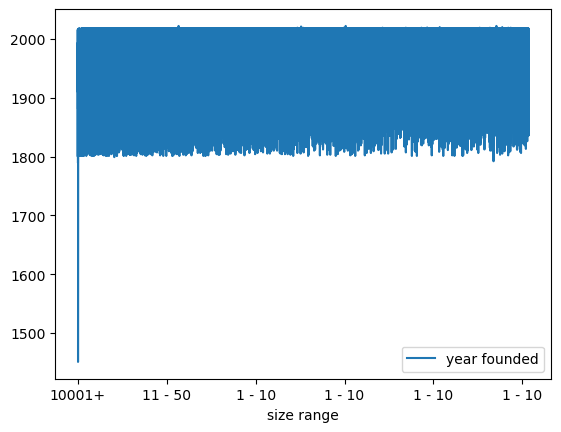

In [24]:
pddf.plot(x="size range", y="year founded")

<AxesSubplot:xlabel='size range'>

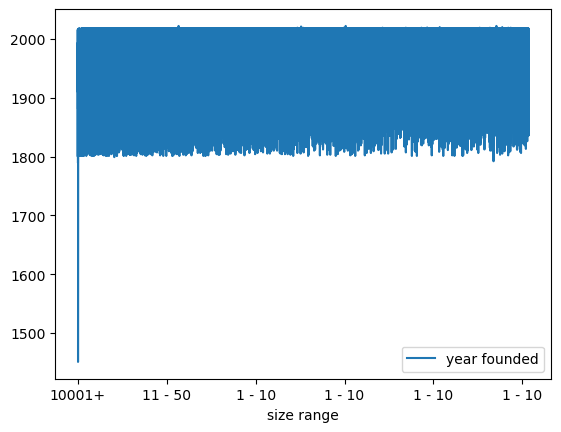

In [25]:
df.to_pandas().plot(x="size range", y="year founded")

In [26]:
del pddf
del df